In [1]:
import warnings; warnings.simplefilter('ignore')
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor


in:   [1.61646318435669, 1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327]
out:  [7.53700017929077, 7.52199983596802, 7.50400018692017, 7.49399995803833, 7.4689998626709]


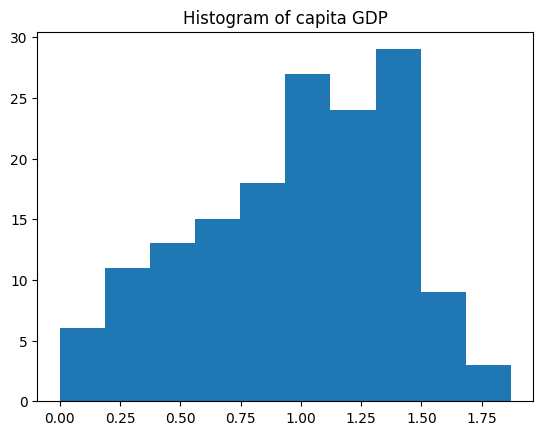

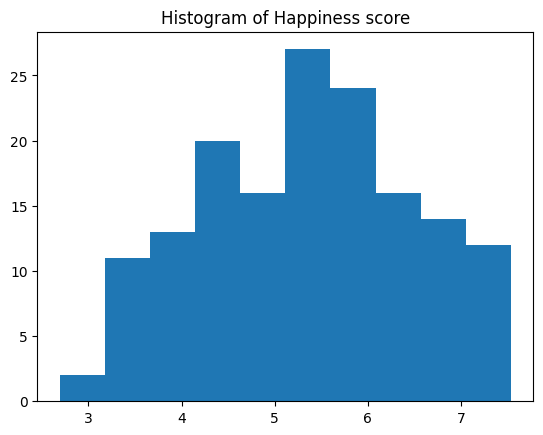

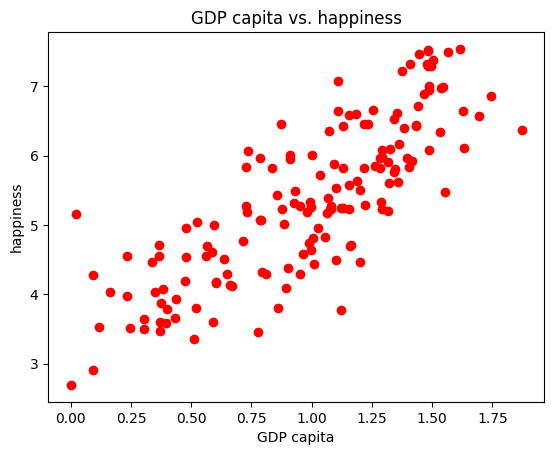

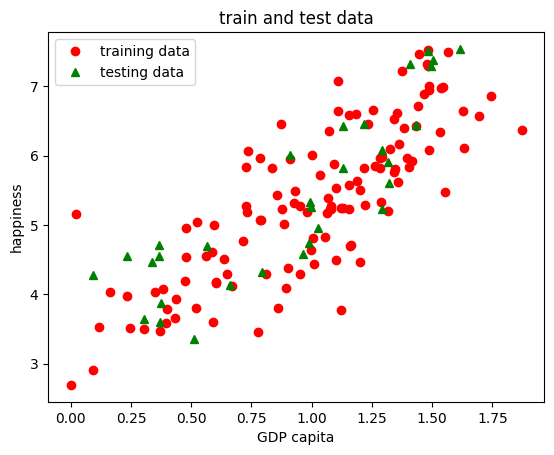

The learnt model: f(x) = [3.01186807]  +  2.283100144983591  * x


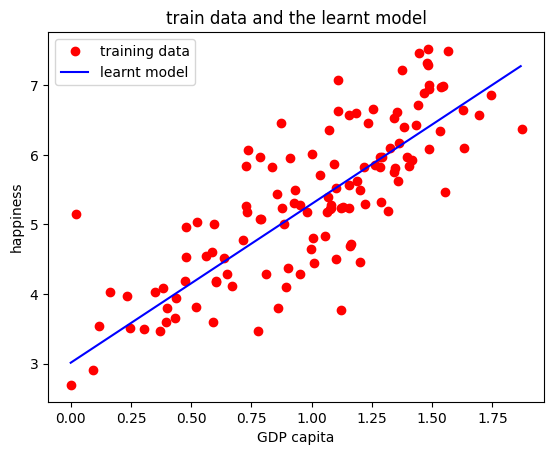

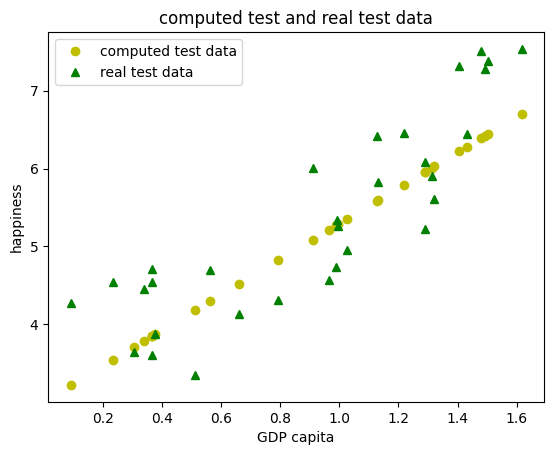

prediction error (manual):  0.4351330543015435
prediction error (tool):   0.4351330543015436


In [2]:


def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs

import os

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])


def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram(inputs, "capita GDP")
plotDataHistogram(outputs, "Happiness score")

plt.plot(inputs, outputs, 'ro')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('GDP capita vs. happiness')
plt.show()


np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')
plt.plot(testInputs, testOutputs, 'g^', label = 'testing data')
plt.title('train and test data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

xx = [[el] for el in trainInputs]

batch_size = 1000
n_samples = len(trainInputs)

regressor = SGDRegressor(learning_rate='constant', eta0=0.09, max_iter=10000, random_state=42)

for i in range(0, n_samples, batch_size):
    X_batch = xx[i:i + batch_size]
    y_batch = trainOutputs[i:i + batch_size]
    regressor.partial_fit(X_batch, y_batch)

w0, w1 = regressor.intercept_, regressor.coef_[0]
print('The learnt model: f(x) =', w0, ' + ', w1, ' * x')

noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')
plt.plot(xref, yref, 'b-', label = 'learnt model')
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

computedTestOutputs = regressor.predict([[x] for x in testInputs])

plt.plot(testInputs, computedTestOutputs, 'yo', label = 'computed test data')
plt.plot(testInputs, testOutputs, 'g^', label = 'real test data')
plt.title('computed test and real test data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)
print('prediction error (manual): ', error)

from sklearn.metrics import mean_squared_error

error = mean_squared_error(testOutputs, computedTestOutputs)
print('prediction error (tool):  ', error)

in:   [1.61646318435669, 1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327]
in:  [0.635422587394714, 0.626006722450256, 0.627162635326385, 0.620070576667786, 0.617950856685638]
out:  [7.53700017929077, 7.52199983596802, 7.50400018692017, 7.49399995803833, 7.4689998626709]


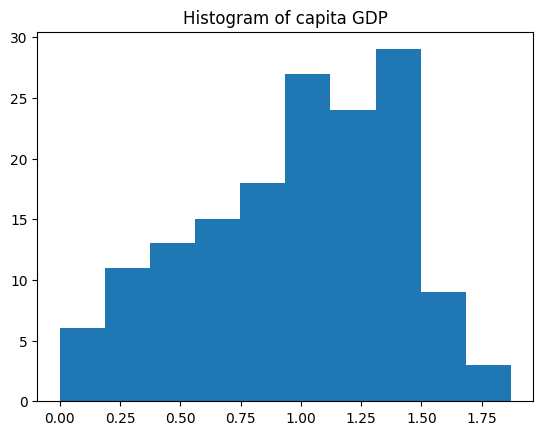

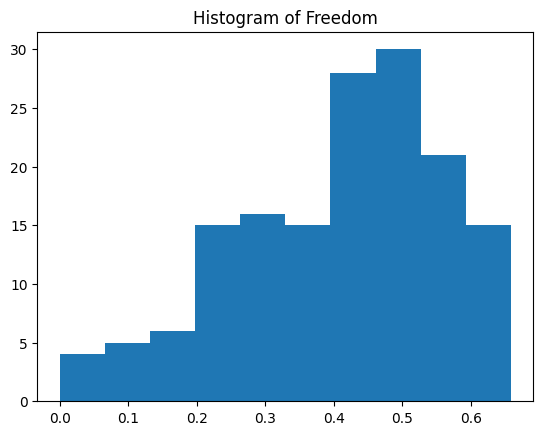

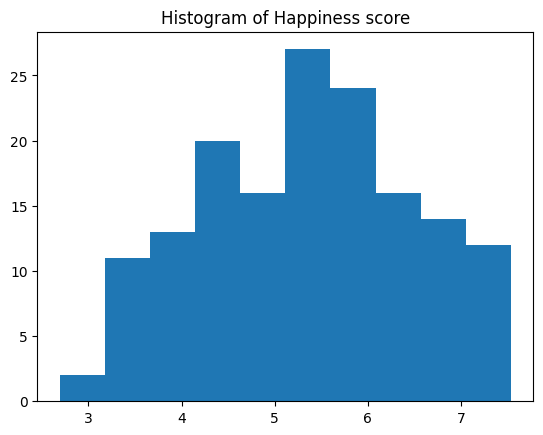

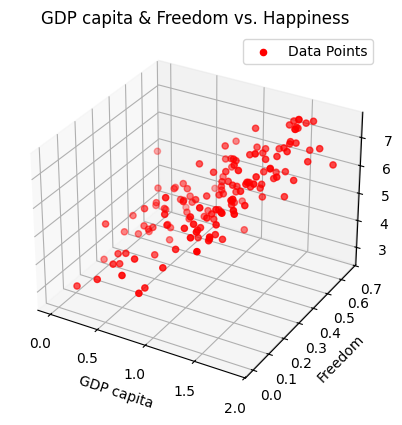

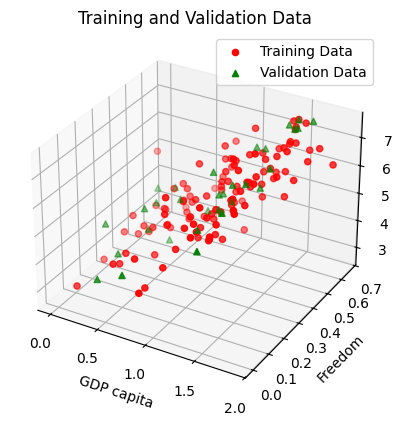

The learnt model: f(x) = [2.68481041]  +  2.0828491990110645  * x


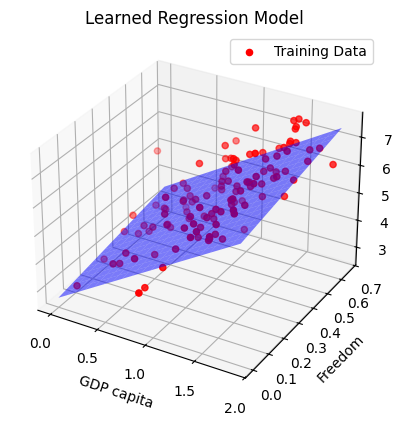

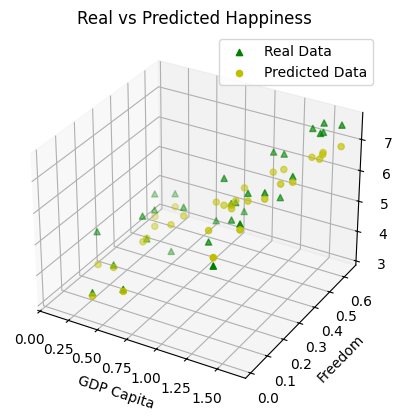

prediction error (manual):  0.33683088841515396
prediction error (tool):   0.33683088841515396


In [3]:
inputs1, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')
inputs2, outputs = loadData(filePath, 'Freedom', 'Happiness.Score')
print('in:  ', inputs1[:5])
print('in: ', inputs2[:5])
print('out: ', outputs[:5])

plotDataHistogram(inputs1, 'capita GDP')
plotDataHistogram(inputs2, 'Freedom')
plotDataHistogram(outputs, 'Happiness score')


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inputs1, inputs2, outputs, c='r', marker='o', label='Data Points')
ax.set_xlabel('GDP capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness')
ax.set_title('GDP capita & Freedom vs. Happiness')
plt.legend()
plt.show()


np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
validationSample = [i for i in indexes  if not i in trainSample]

trainInputs1 = [inputs1[i] for i in trainSample]
trainInputs2 = [inputs2[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputs1 = [inputs1[i] for i in validationSample]
validationInputs2 = [inputs2[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trainInputs1, trainInputs2, trainOutputs, color='red', marker='o', label='Training Data')
ax.scatter(validationInputs1, validationInputs2, validationOutputs, color='green', marker='^', label='Validation Data')
ax.set_xlabel('GDP capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness')
ax.set_title('Training and Validation Data')
plt.legend()
plt.show()

trainInputs = np.column_stack((trainInputs1, trainInputs2))

batch_size = 1000
n_samples = len(trainInputs)

regressor = SGDRegressor(learning_rate='constant', eta0=0.09, max_iter=10000, random_state=42)

for i in range(0, n_samples, batch_size):
    X_batch = trainInputs[i:i + batch_size]
    y_batch = trainOutputs[i:i + batch_size]

    regressor.partial_fit(X_batch, y_batch)

w0 = regressor.intercept_
w1, w2 = regressor.coef_
print('The learnt model: f(x) =', w0, ' + ', w1, ' * x')


gdp_range = np.linspace(min(trainInputs1), max(trainInputs1), 20)
freedom_range = np.linspace(min(trainInputs2), max(trainInputs2), 20)
GDP_grid, Freedom_grid = np.meshgrid(gdp_range, freedom_range)

Happiness_grid = w0 + w1 * GDP_grid + w2 * Freedom_grid

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(trainInputs1, trainInputs2, trainOutputs, color='red', marker='o', label='Training Data')

ax.plot_surface(GDP_grid, Freedom_grid, Happiness_grid, color='blue', alpha=0.5)

ax.set_xlabel('GDP capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness')
ax.set_title('Learned Regression Model')

plt.legend()
plt.show()


computedValidationOutputs = regressor.predict(list(zip(validationInputs1, validationInputs2)))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(validationInputs1, validationInputs2, validationOutputs, c='g', marker='^', label='Real Data')
ax.scatter(validationInputs1, validationInputs2, computedValidationOutputs, c='y', marker='o', label='Predicted Data')
ax.set_xlabel('GDP Capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness')
ax.set_title('Real vs Predicted Happiness')
ax.legend()
plt.show()


error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)